In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

## Loading and cleaning

In [64]:
# Loading data from GDrive.

# Data with BDL merged,
file_id = "14VMCwHF2qoezvXykUvjfMNM1a573gQ8M"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.csv"
gdown.download(url, file_extension, quiet=False)
df = pd.read_csv(file_extension, sep=",")

Downloading...
From (original): https://drive.google.com/uc?id=14VMCwHF2qoezvXykUvjfMNM1a573gQ8M
From (redirected): https://drive.google.com/uc?id=14VMCwHF2qoezvXykUvjfMNM1a573gQ8M&confirm=t&uuid=77ce1938-c533-4b93-a398-6a9e86e64c02
To: C:\Users\KW\PycharmProjects\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 511M/511M [00:19<00:00, 26.9MB/s] 
C:\Users\KW\AppData\Local\Temp\ipykernel_14452\2459605807.py:8: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_extension, sep=",")


In [65]:
# Changing "," to "." in numerical variables.
comma_cols_to_replace = {
    'mediana_wieku': 'bdl_age_median',
    'wydatki_powiat': 'bdl_district_expenses',
    'wynagrodzenia': 'bdl_average_salary'
}

# Replace commas with dots and convert to float.
for old_col, new_col in comma_cols_to_replace.items():
    df[new_col] = df[old_col].str.replace(',', '.', regex=False).astype(float)

df.drop(columns=comma_cols_to_replace.keys(), inplace=True)

In [66]:
# Other columns to rename.
col_names_to_replace = {
    'cena_mieszkan': 'bdl_avg_house_pricing',
    'saldo_migracji': 'bdl_migration_coefficient',
    'wsp_feminizacji': 'bdl_feminization_coefficient'
}

for old_col, new_col in col_names_to_replace.items():
    df[new_col] = df[old_col].astype(float)
    df.drop([old_col], axis=1, inplace=True)

## Feature engineering

In [67]:
df['offer_salary'].replace("nie podano wynagrodzenia", np.nan, inplace=True)
df['offer_salary_mentioned'] = df['offer_salary'].notna().astype(int)

C:\Users\KW\AppData\Local\Temp\ipykernel_14452\2997230914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['offer_salary'].replace("nie podano wynagrodzenia", np.nan, inplace=True)


In [68]:
df["len_requirements"] = df["requirements"].str.len()
df["len_nice_to_have"] = df["nice_to_have"].str.len()
df["len_responsibilities"] = df["responsibilities"].str.len()

In [69]:
# Dropping cols unnecessary for statistical analyses.
string_cols_for_temporary_dropping = [
    'ad_id',
    'institution_address',
    'workplace',
    'department',
    'responsibilities',
    'requirements',
    'offer_salary',
    'Unnamed: 0',
    'date_announced',
    'nice_to_have',
    'institution_address',
    'workplace',
    'department',
    'city',
    'position'
]
df = df.drop(string_cols_for_temporary_dropping, axis=1)

In [70]:
# Dealing with categorical columns.
df = pd.get_dummies(df, columns=['position_category', 'job_field'], drop_first=True)

In [71]:
# Aggregating data to institution-level.
df_institution_level = df.groupby(['district', 'voivodeship', 'institution', 'year']).agg('mean').reset_index()

## Analyses

In [72]:
# Variable correlation
numerical_columns_df = df[[
    'work_time',
    'ad_views',
    'applicants',
    'education_level',
    'offer_salary_mentioned',
    'salary_for_position',
    'women_percentage',
    'bdl_feminization_coefficient',
    'fluctuation',
    'employment_contract',
    'bdl_avg_house_pricing',
    'bdl_age_median',
    'bdl_migration_coefficient',
    'bdl_district_expenses',
    'bdl_average_salary',
    'education_level',
    'offer_salary_mentioned',
    'vacancies',
    'len_requirements',
    'len_nice_to_have',
    'len_responsibilities',
    'result'
]]


correlation = numerical_columns_df.corr()['result']

# Display the correlation matrix
print(correlation)

work_time                      -0.006045
ad_views                        0.228746
applicants                      0.328321
education_level                -0.171731
offer_salary_mentioned          0.056738
salary_for_position             0.011918
women_percentage                0.025791
bdl_feminization_coefficient   -0.011355
fluctuation                    -0.065407
employment_contract             0.156612
bdl_avg_house_pricing          -0.090104
bdl_age_median                  0.020876
bdl_migration_coefficient      -0.056334
bdl_district_expenses          -0.080232
bdl_average_salary             -0.022229
education_level                -0.171731
offer_salary_mentioned          0.056738
vacancies                       0.067366
len_requirements               -0.070474
len_nice_to_have                0.000581
len_responsibilities           -0.105185
result                          1.000000
Name: result, dtype: float64


In [73]:
df_institution_level.describe()

,district,voivodeship,year,result,education_level,work_time,vacancies,ad_views,advertised_institution,applicants,...,job_field_documents,job_field_environment,job_field_law,job_field_other,job_field_other_manager,job_field_pharmacy/chemistry,job_field_tech/construction,job_field_uniformed services,job_field_vet,job_field_water
count,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,6553.000000,10021.000000,...,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000,12204.000000
mean,36.726319,16.938545,2020.290888,0.743335,2.352272,0.970849,1.082350,2158.267727,0.769419,9.186509,...,0.221916,0.025206,0.425263,0.047104,0.016987,0.012159,0.032111,0.050148,0.128050,0.003912
std,26.734649,9.258991,1.842645,0.329296,0.778697,0.107521,0.280305,816.494245,0.421237,9.987664,...,0.374435,0.136473,0.432803,0.182236,0.104243,0.102447,0.154821,0.193925,0.321476,0.057834
min,1.000000,2.000000,2017.000000,0.000000,1.000000,0.100000,1.000000,183.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,2019.000000,0.500000,2.000000,1.000000,1.000000,1447.000000,1.000000,2.465116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,16.000000,2020.000000,1.000000,2.000000,1.000000,1.000000,2284.583333,1.000000,5.972662,...,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,24.000000,2022.000000,1.000000,3.000000,1.000000,1.000000,2693.105769,1.000000,13.000000,...,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,32.000000,2023.000000,1.000000,4.000000,2.000000,5.000000,11287.000000,1.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


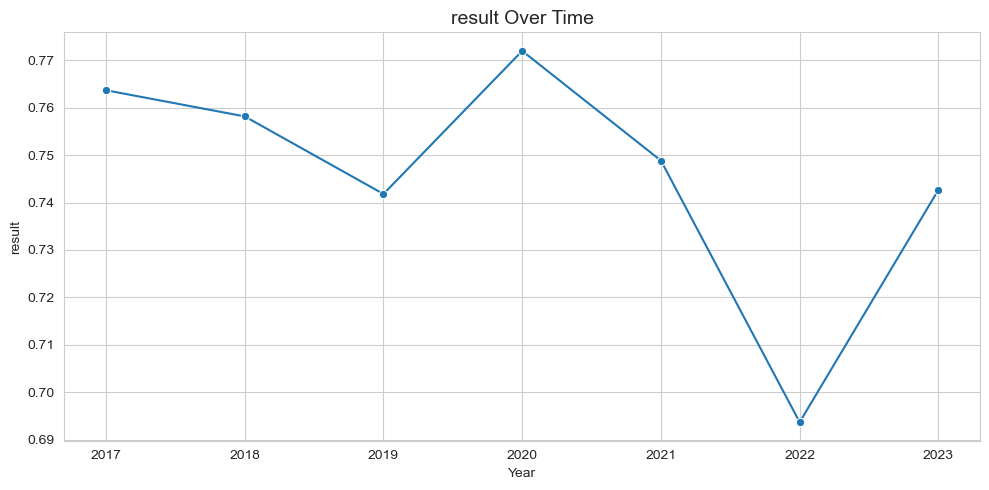

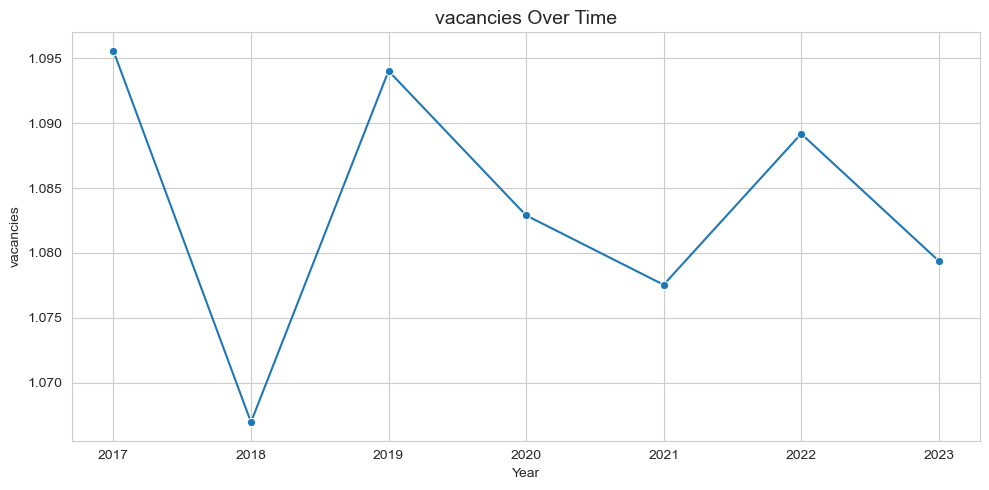

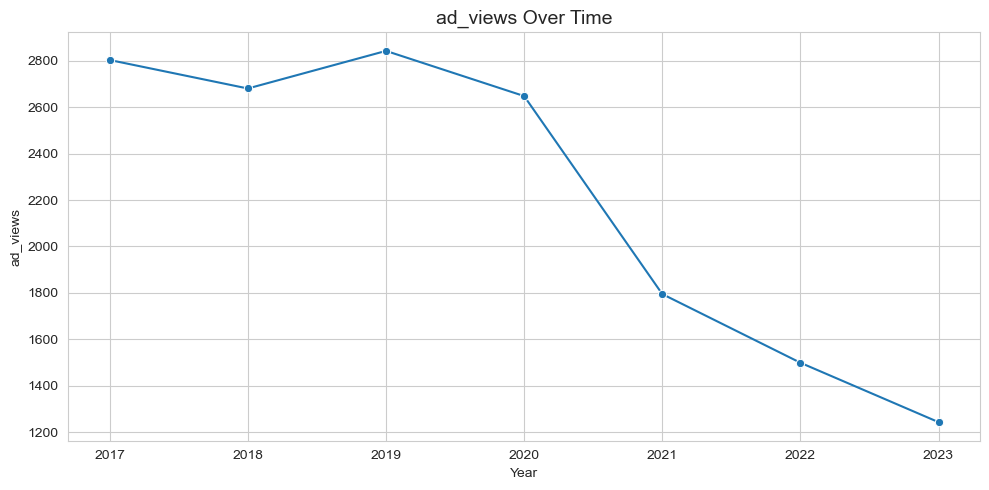

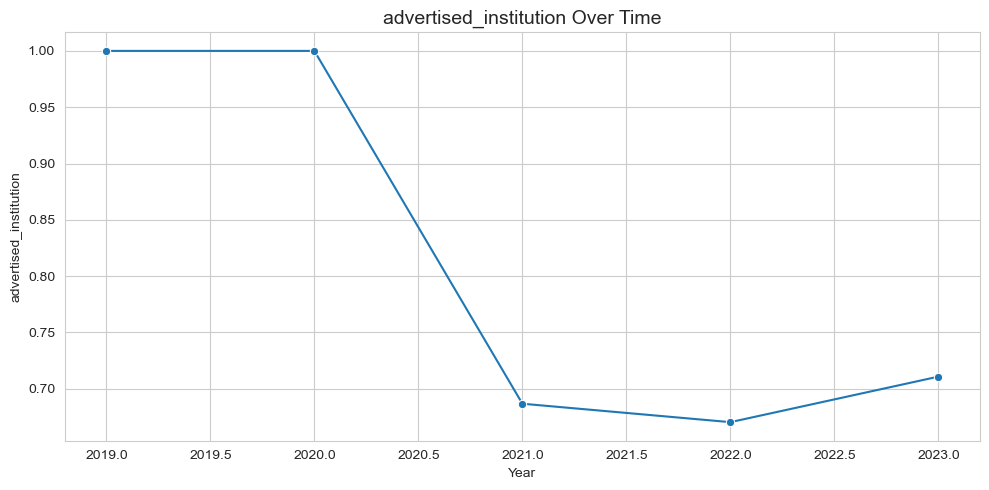

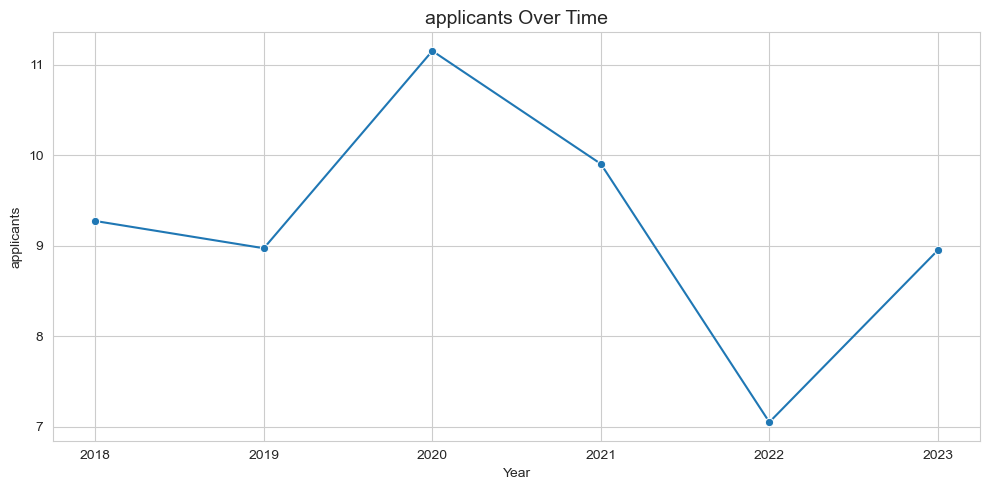

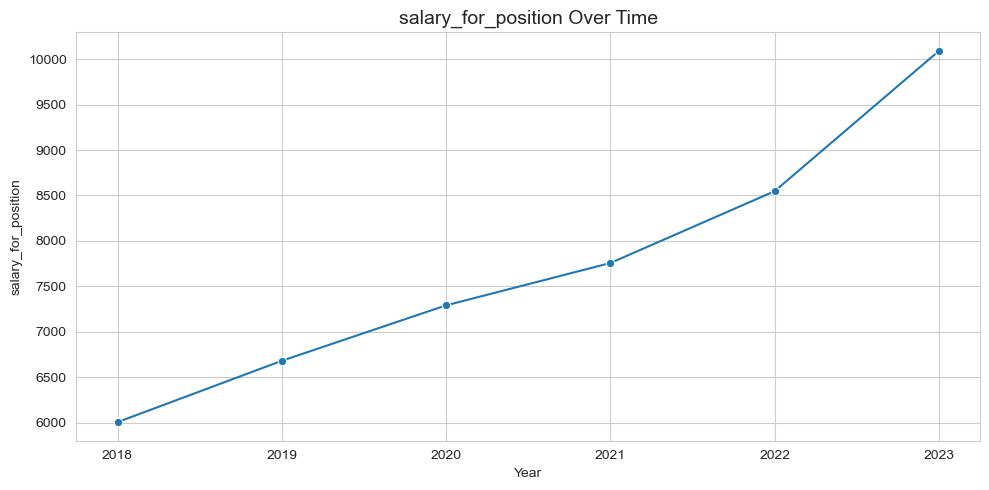

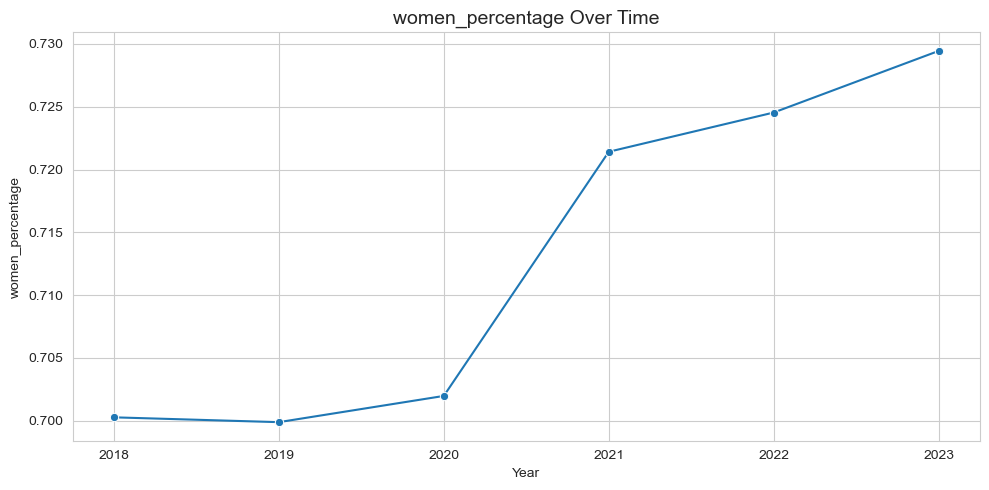

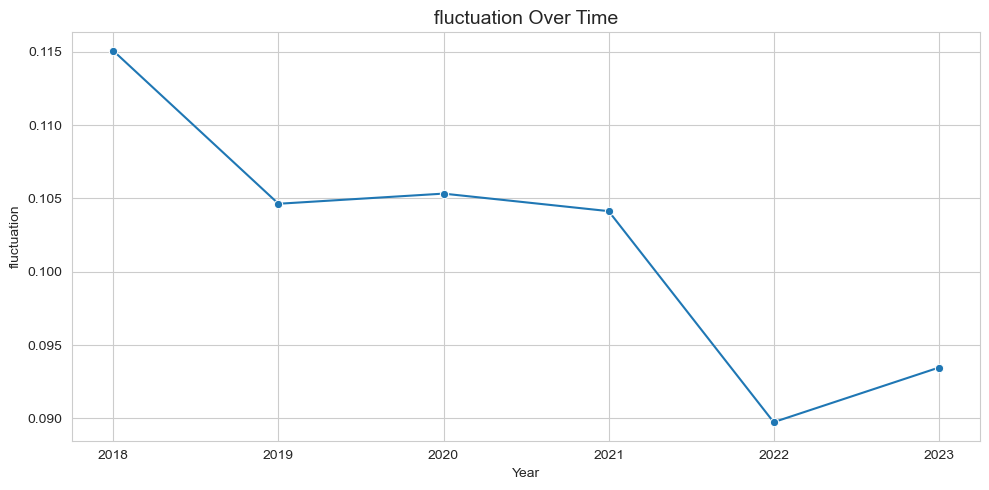

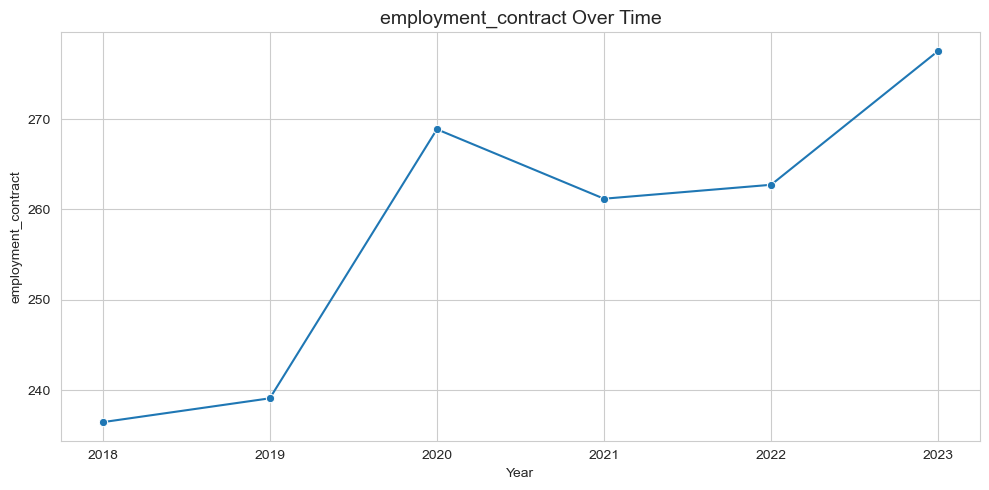

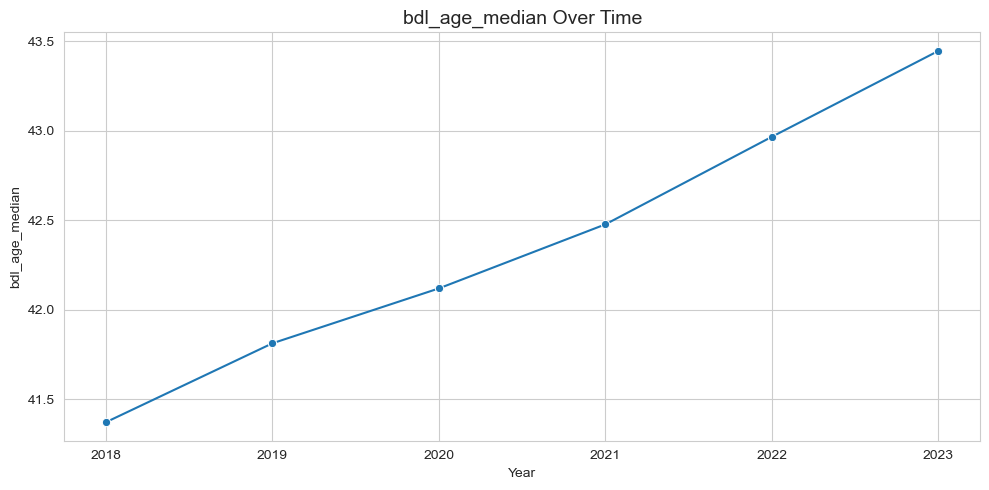

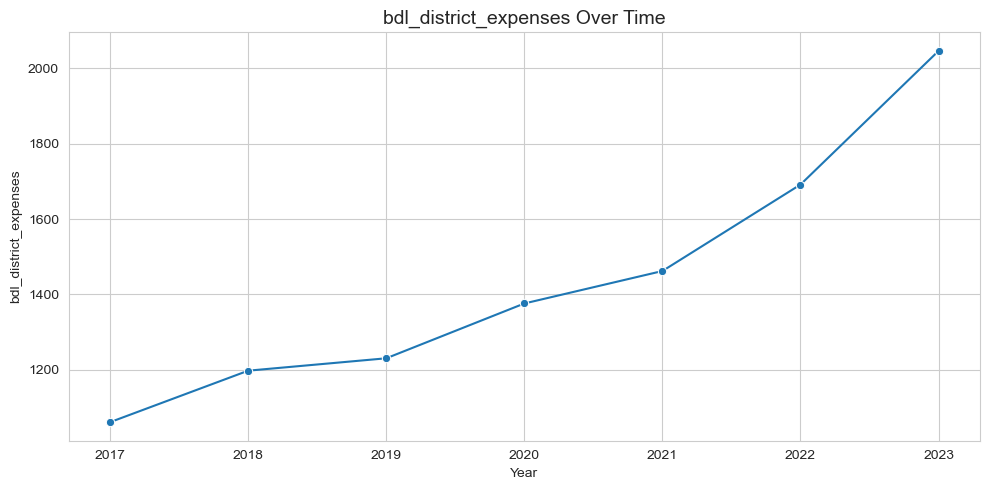

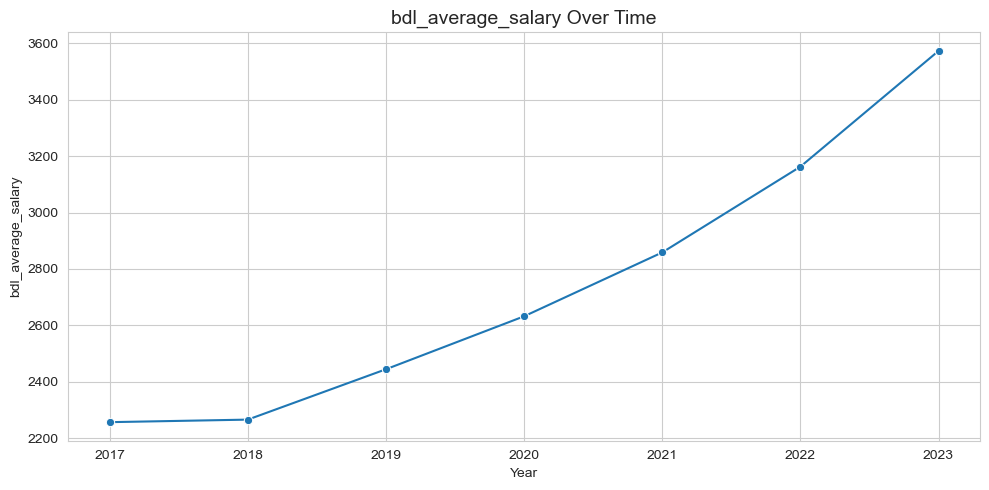

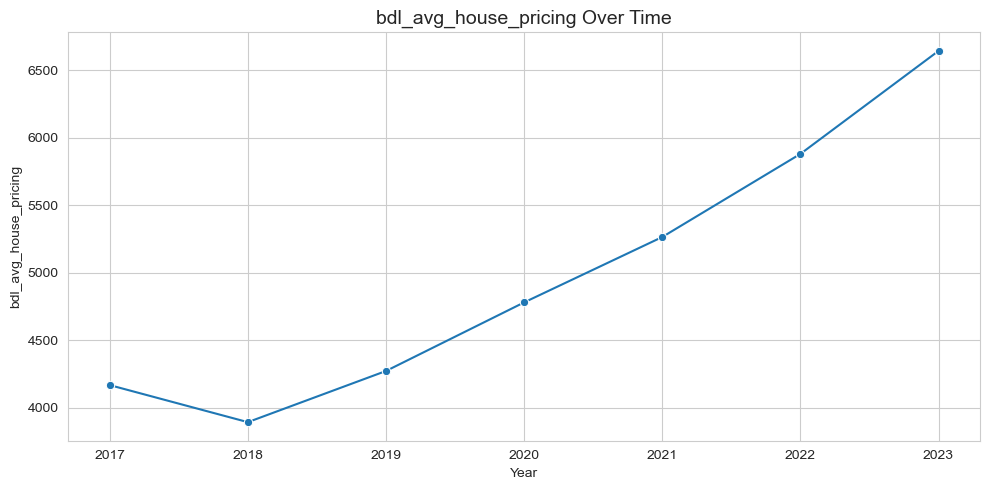

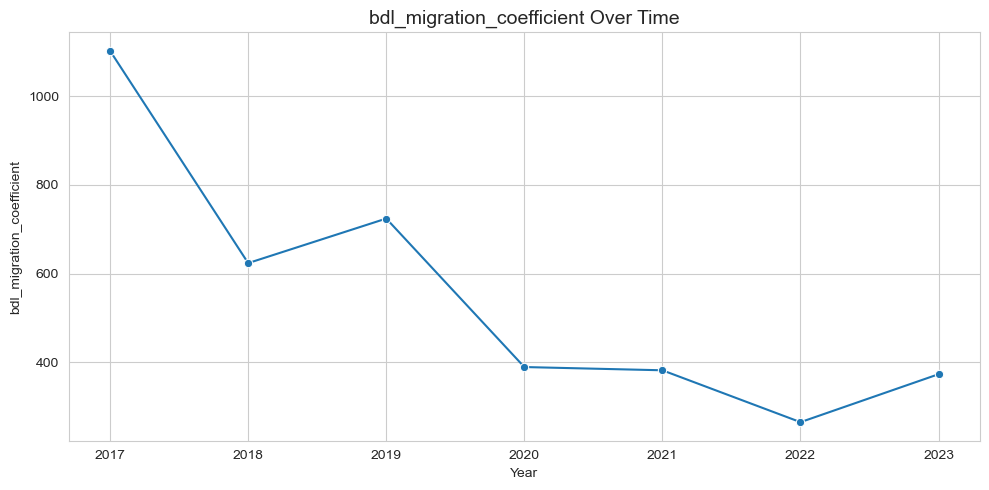

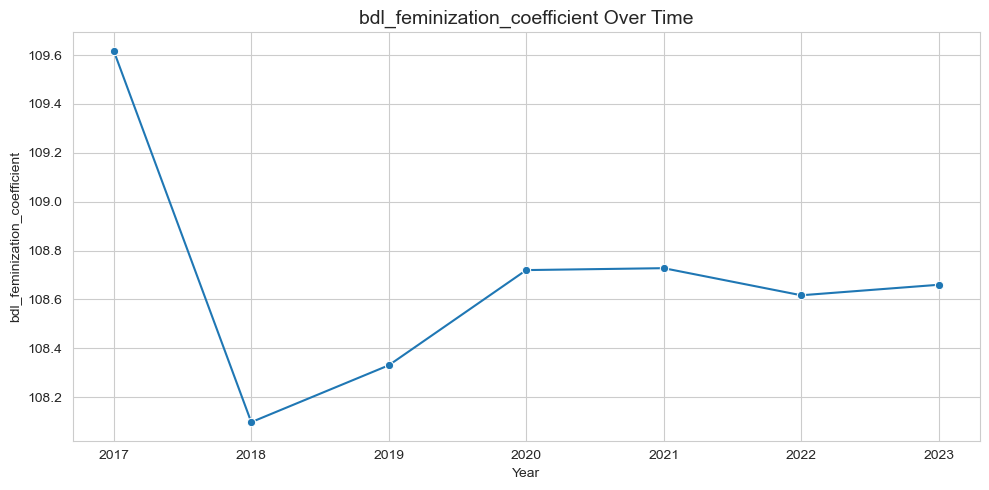

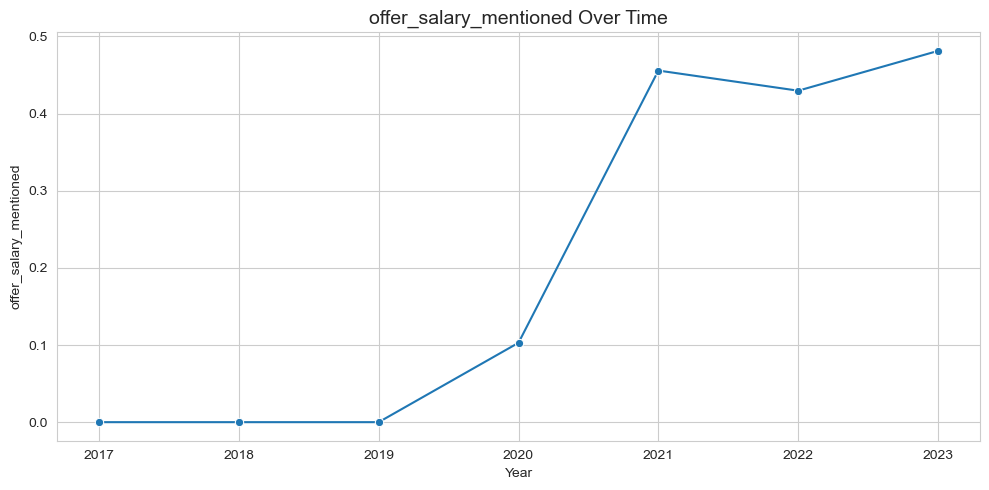

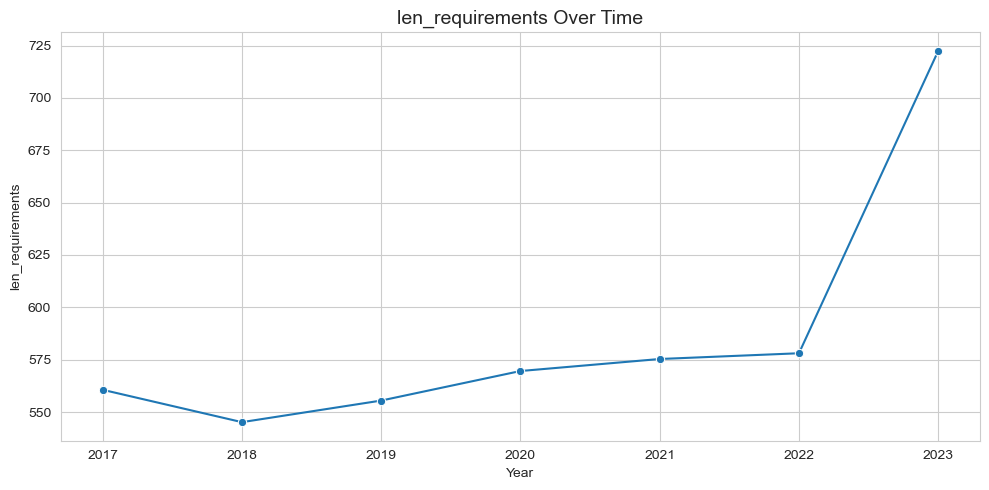

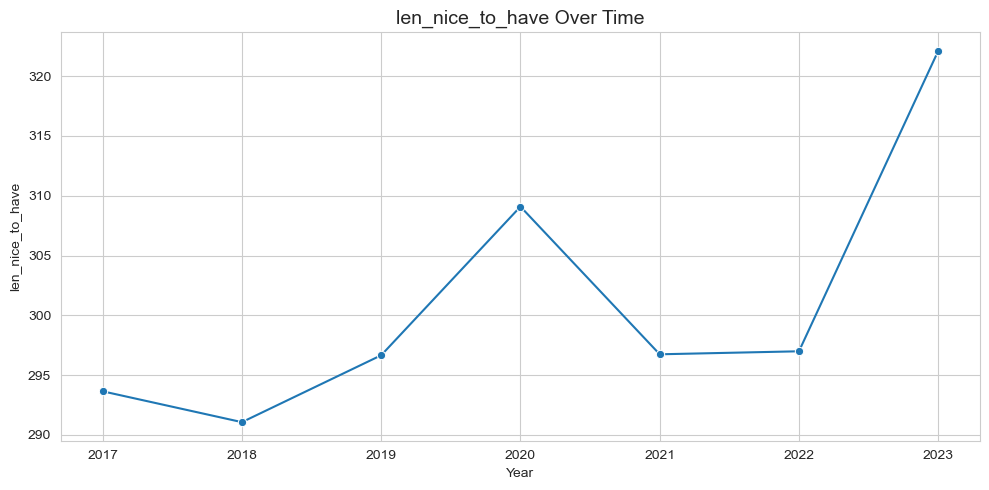

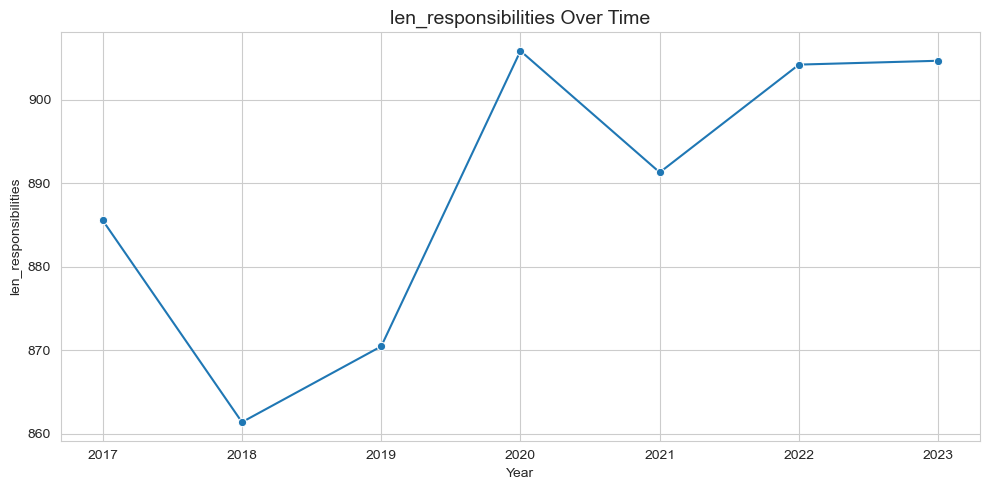

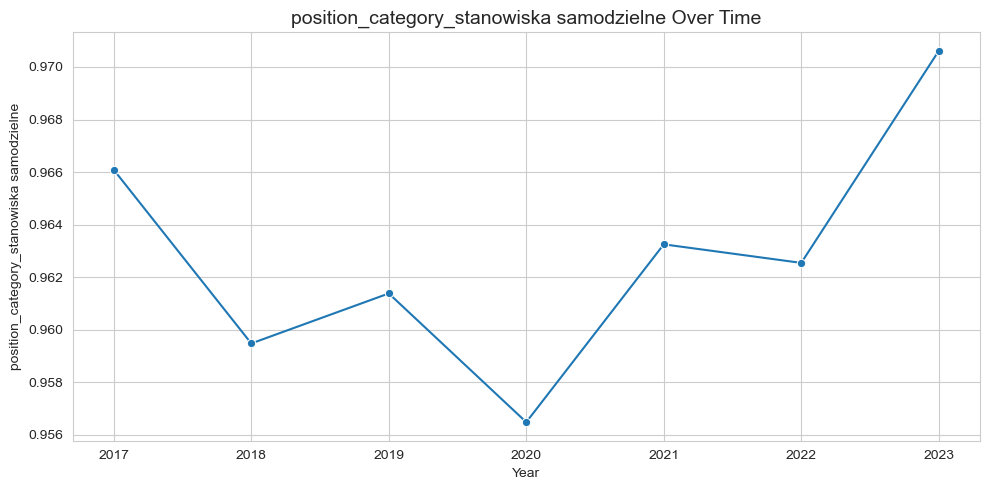

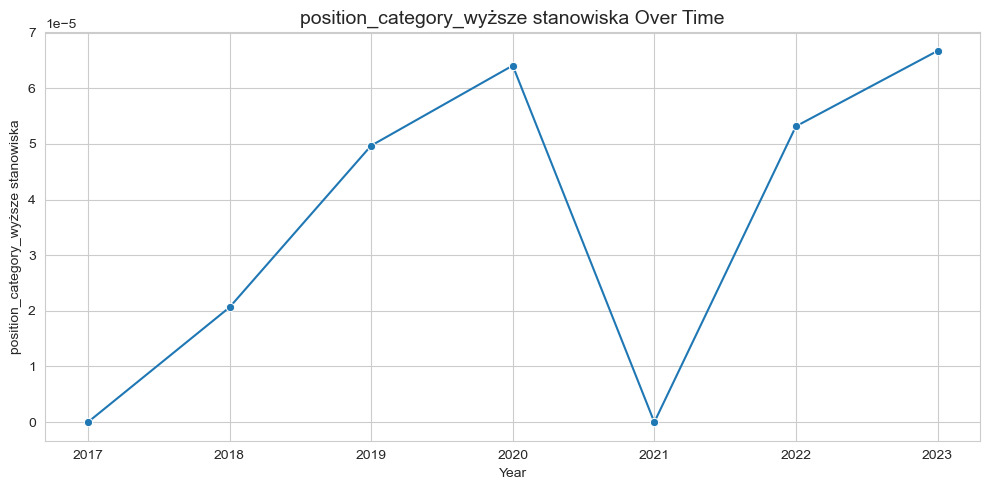

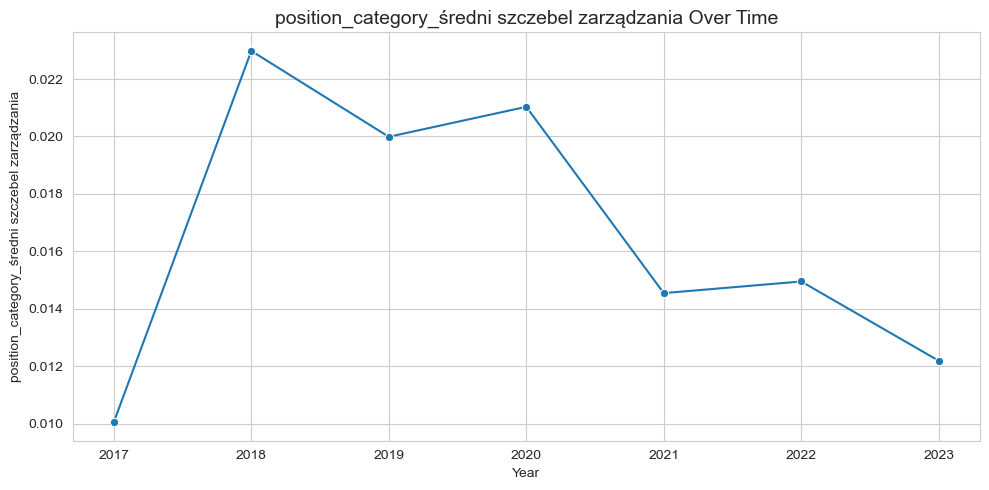

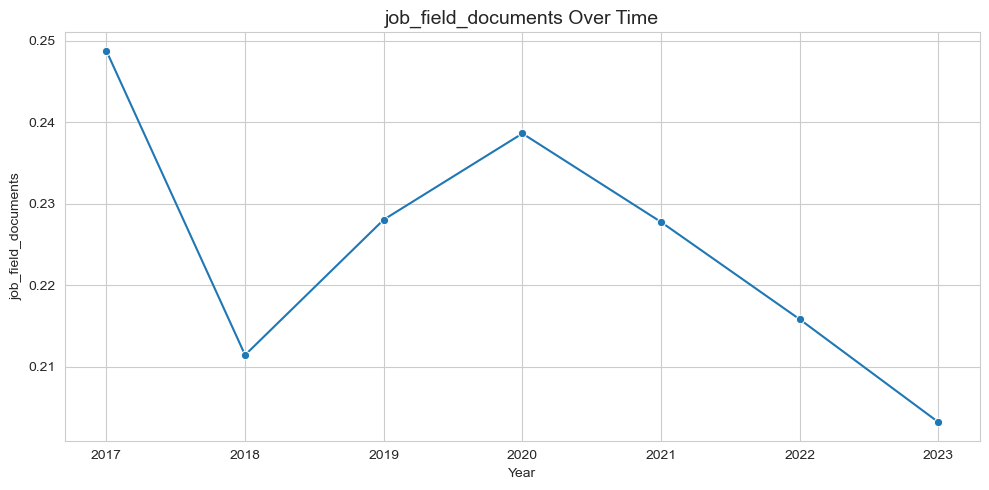

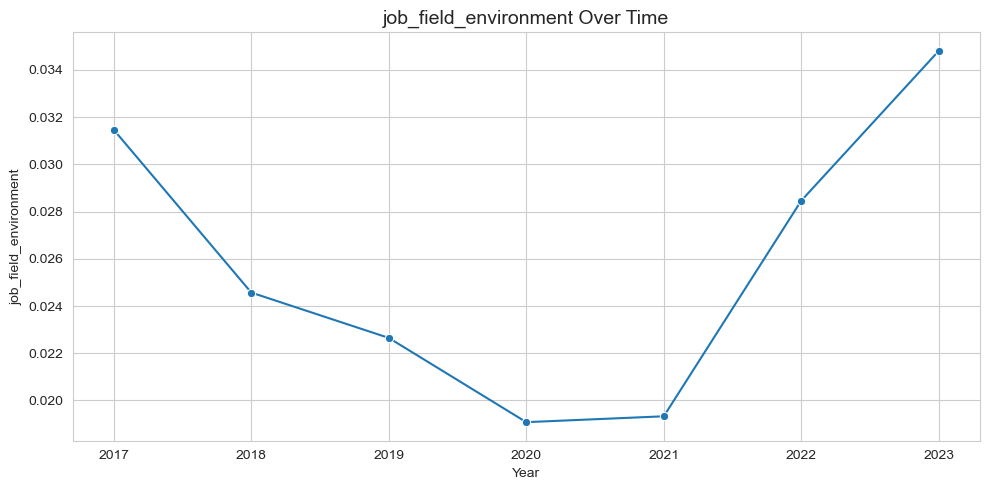

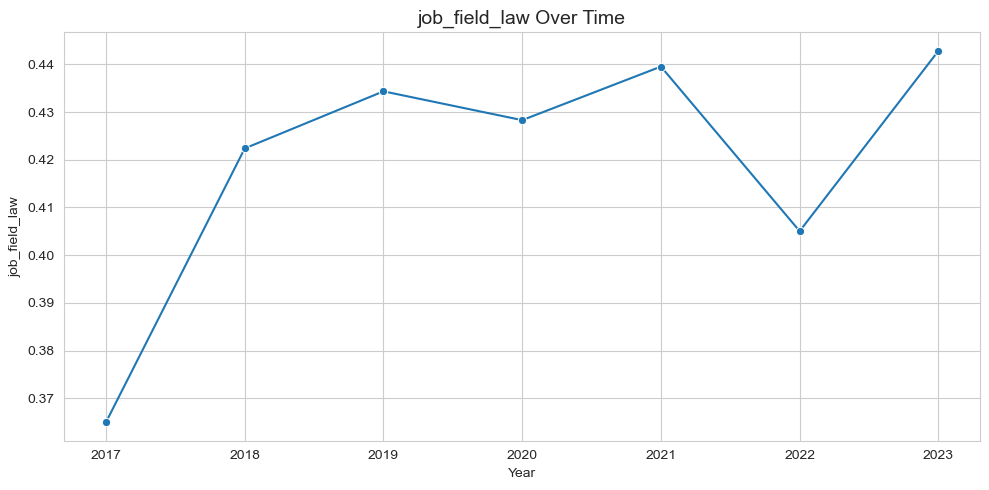

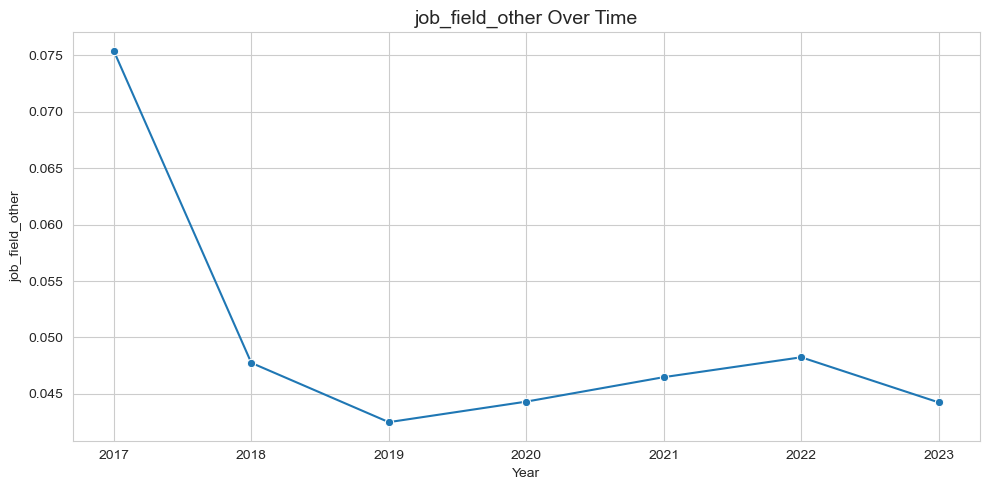

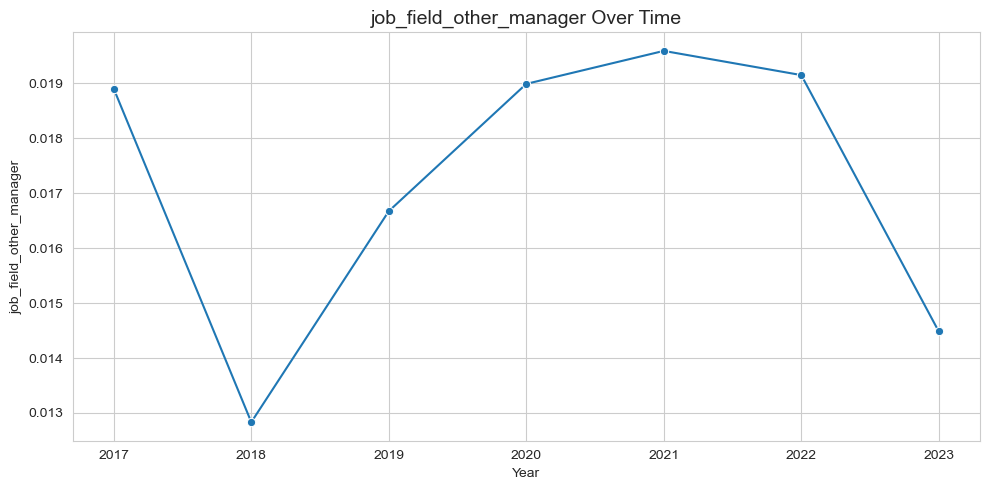

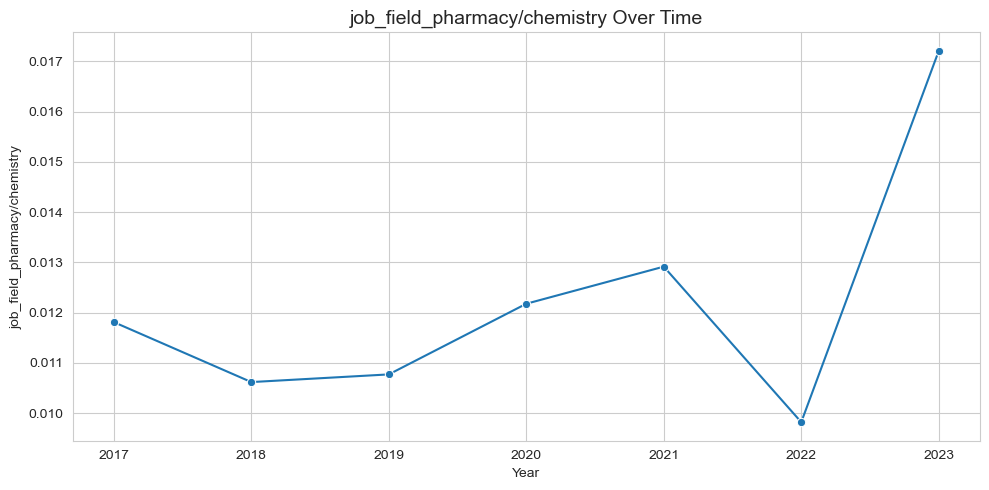

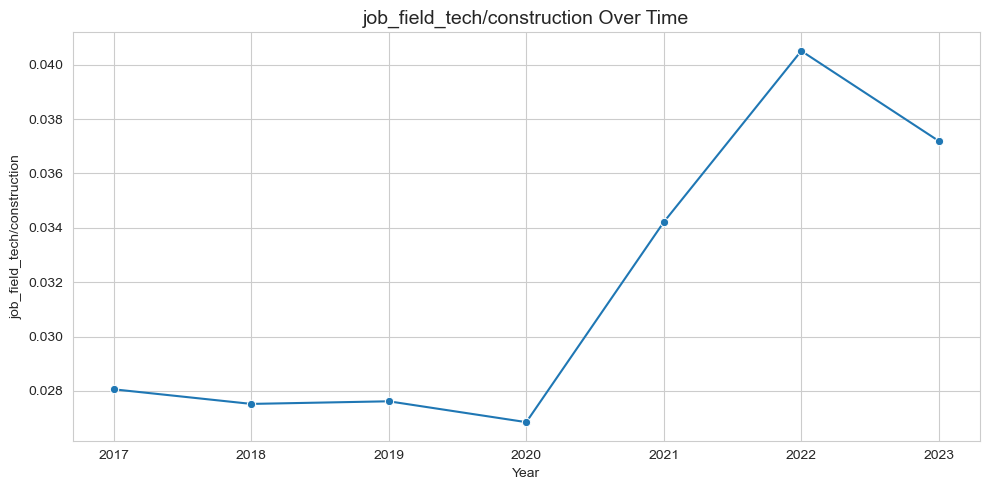

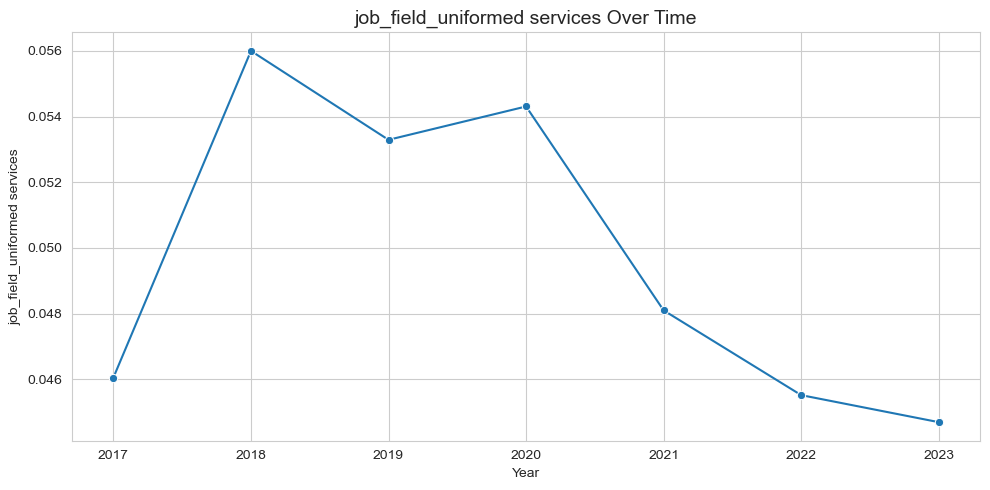

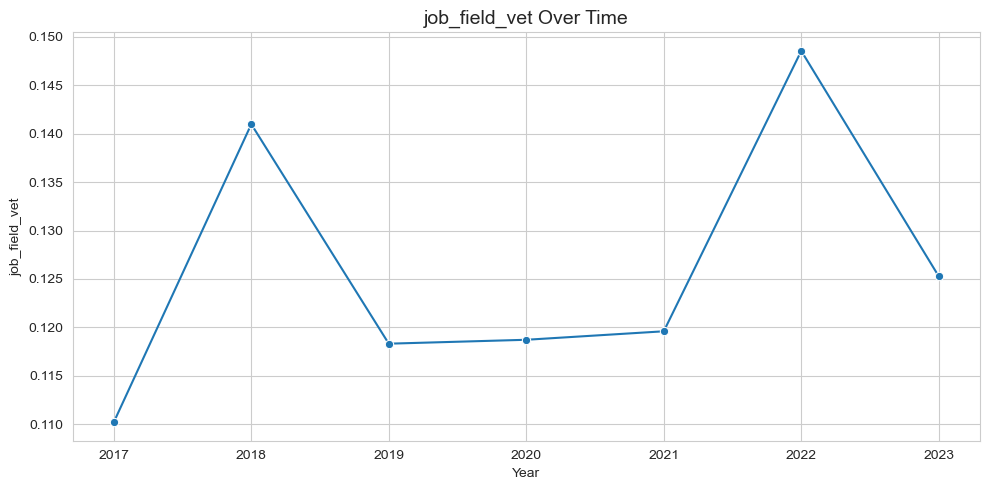

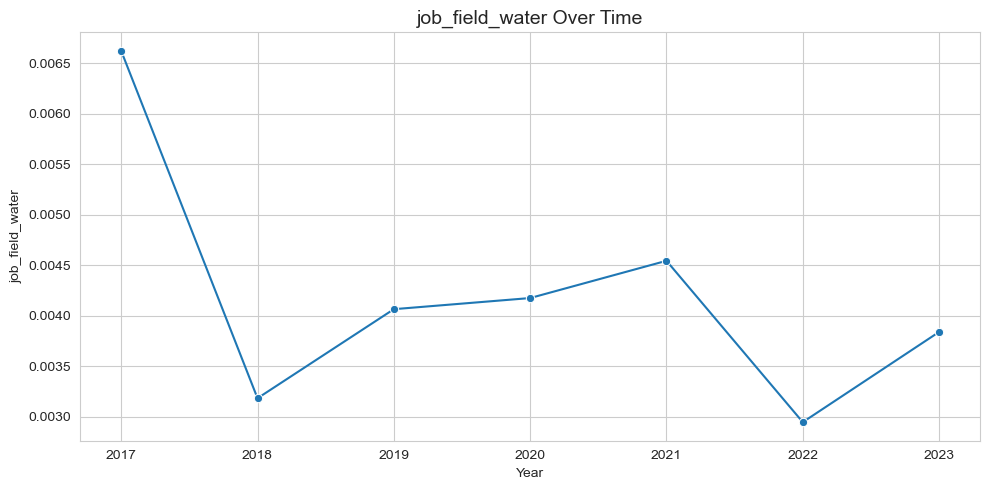

In [74]:
def plot_individual_time_series(dataframe):
    # Columns to exclude from plotting
    exclude_columns = ['voivodeship', 'district', 'education_level', 'work_time', 'institution']

    # Group by year and compute mean for numeric columns only.
    df_grouped = dataframe.groupby('year').mean(numeric_only=True)

    # Drop the excluded columns (if they exist).
    columns_to_plot = [col for col in df_grouped.columns if col not in exclude_columns]

    # Plot each column individually
    for column in columns_to_plot:
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=df_grouped.index, y=df_grouped[column], marker='o')
        plt.title(f"{column} Over Time", fontsize=14)
        plt.xlabel("Year")
        plt.ylabel(column)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_individual_time_series(df_institution_level)

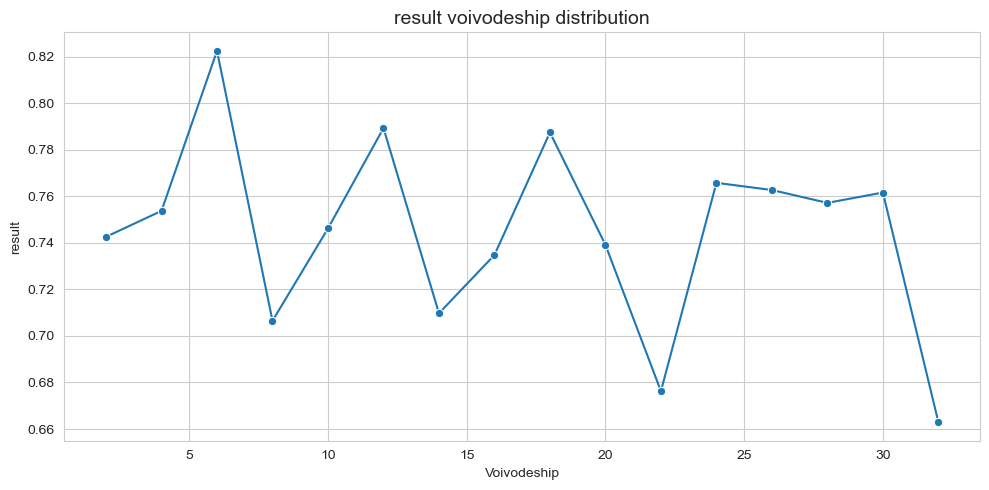

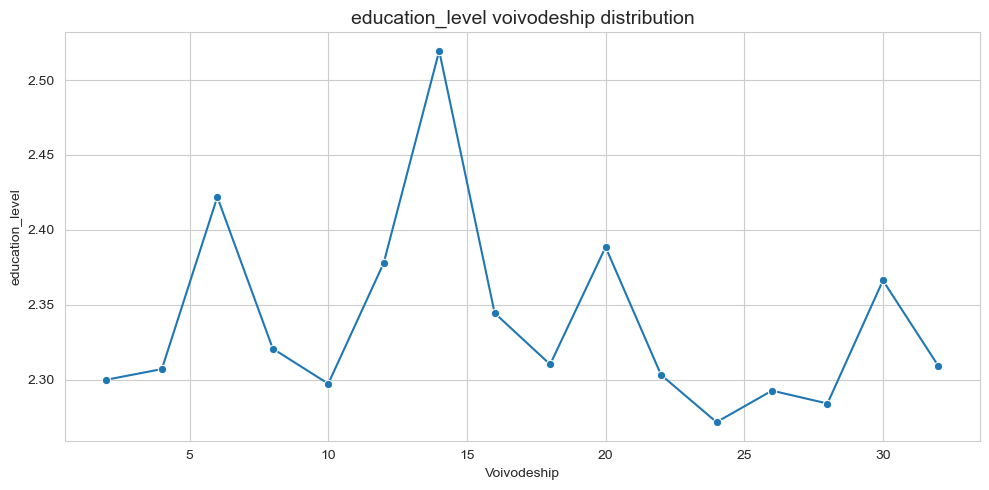

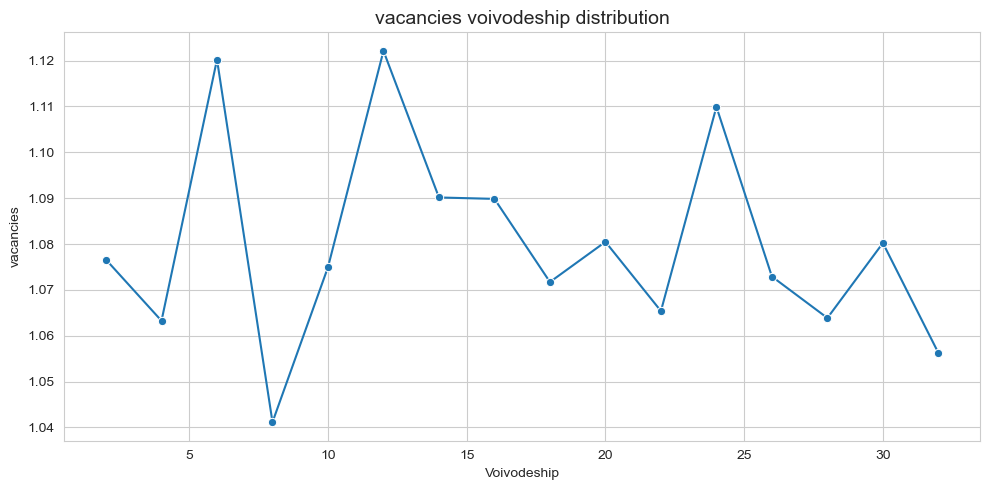

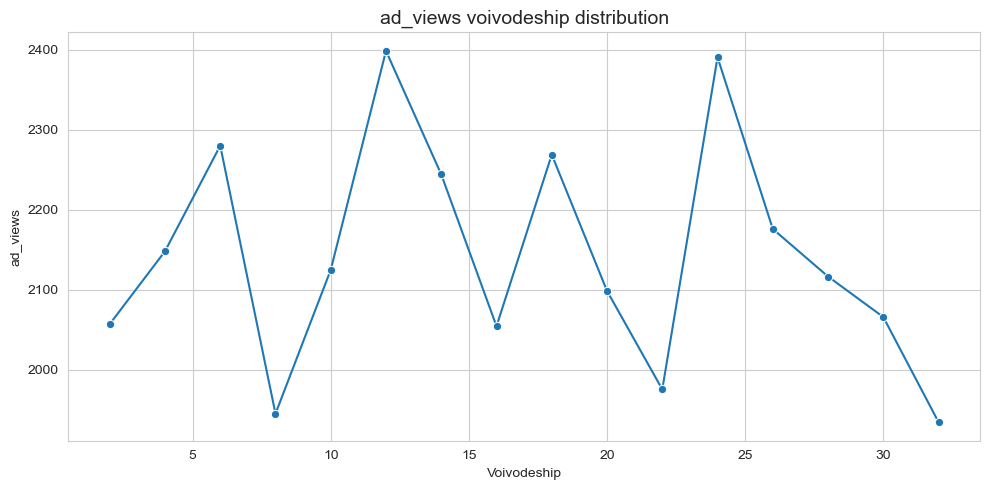

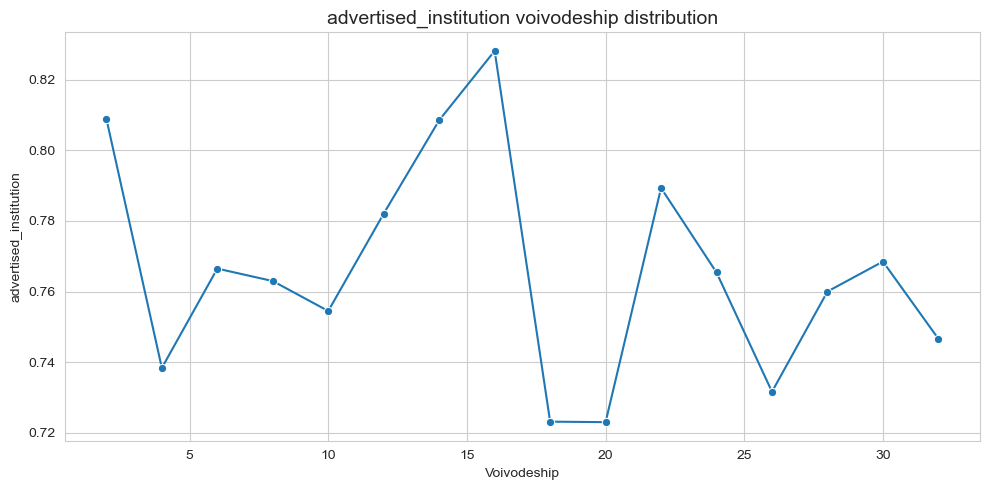

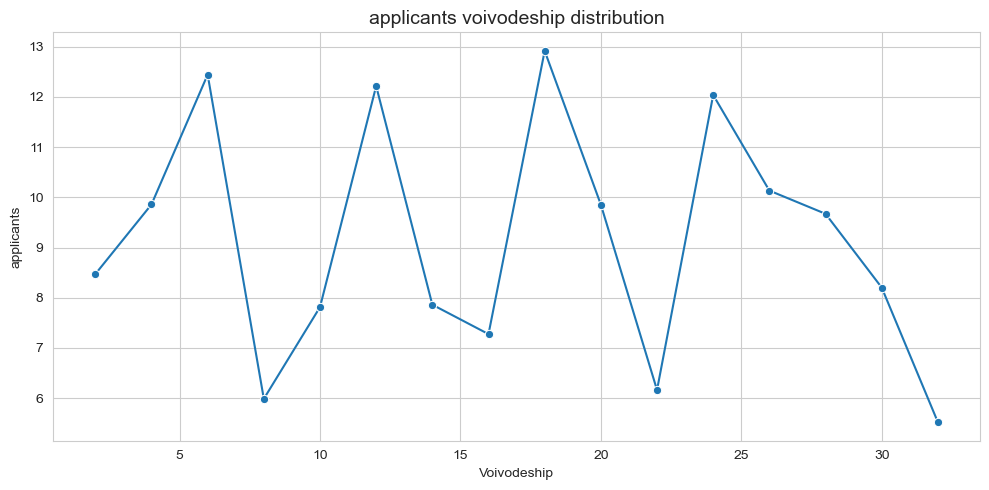

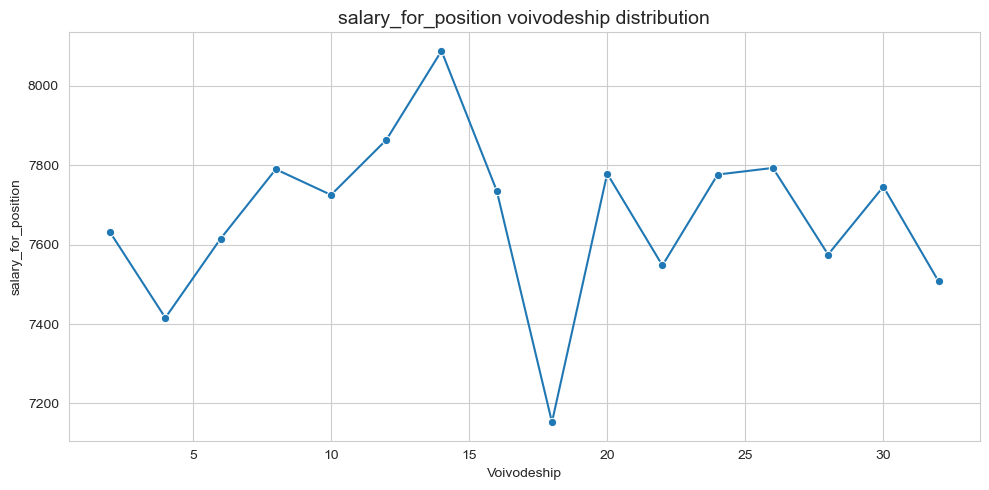

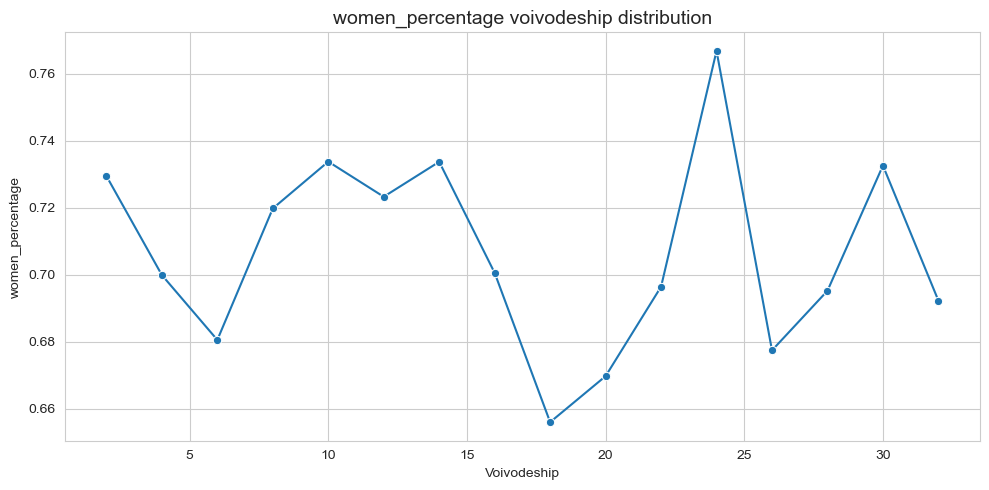

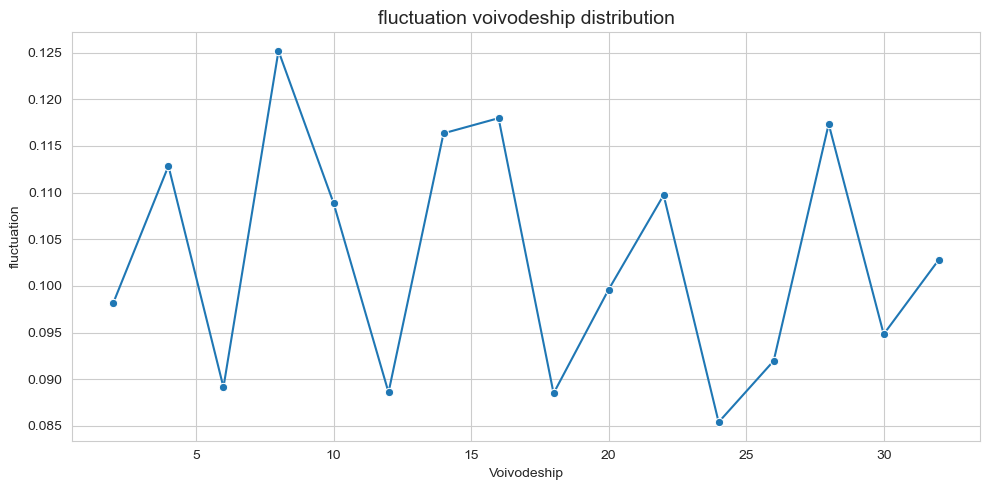

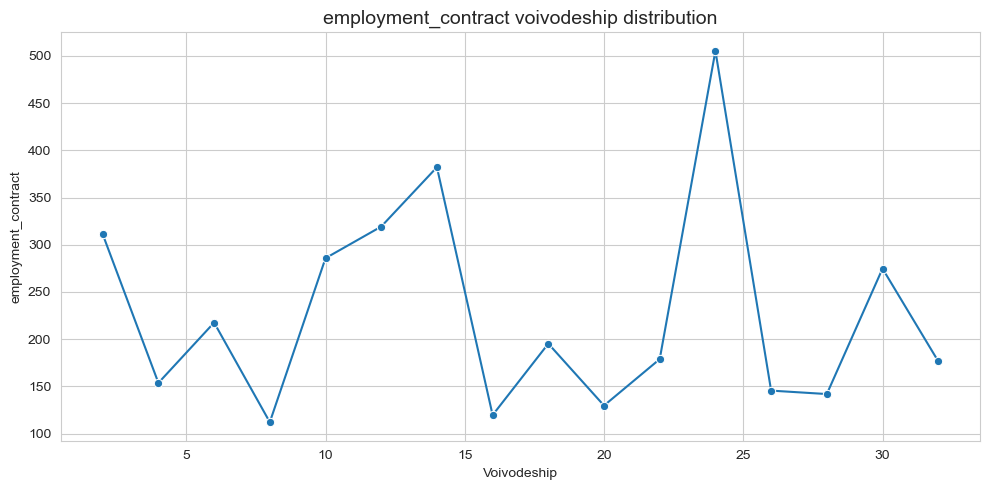

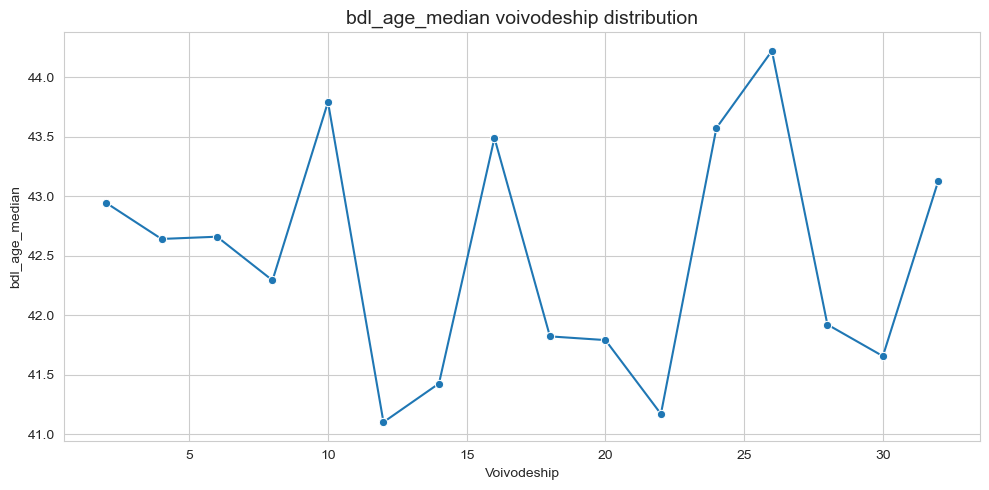

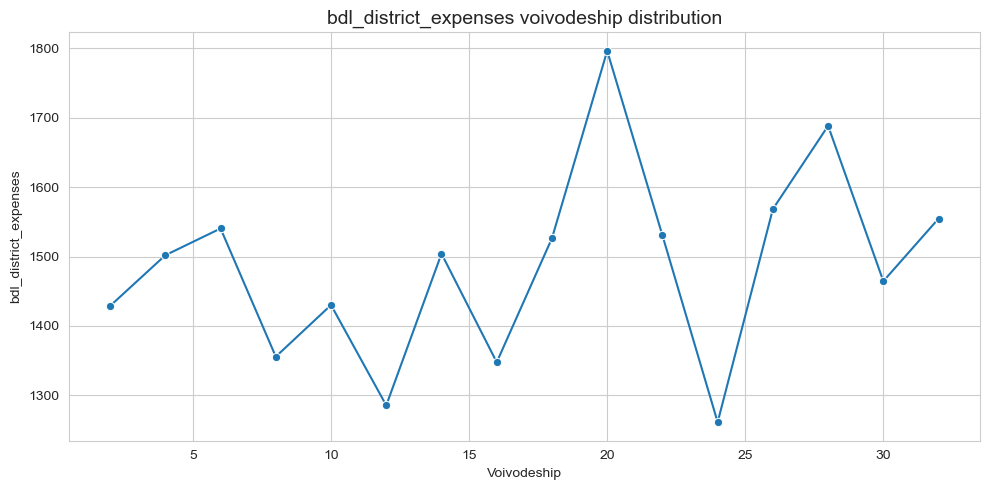

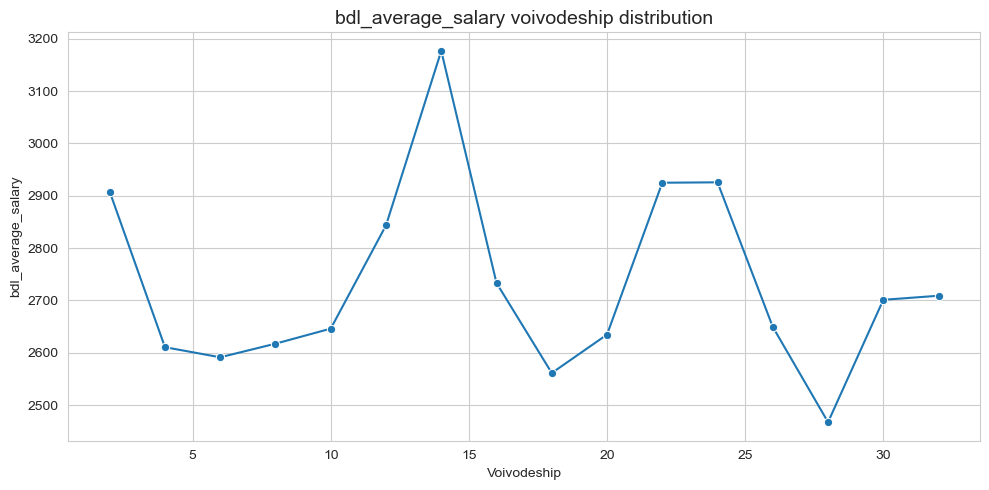

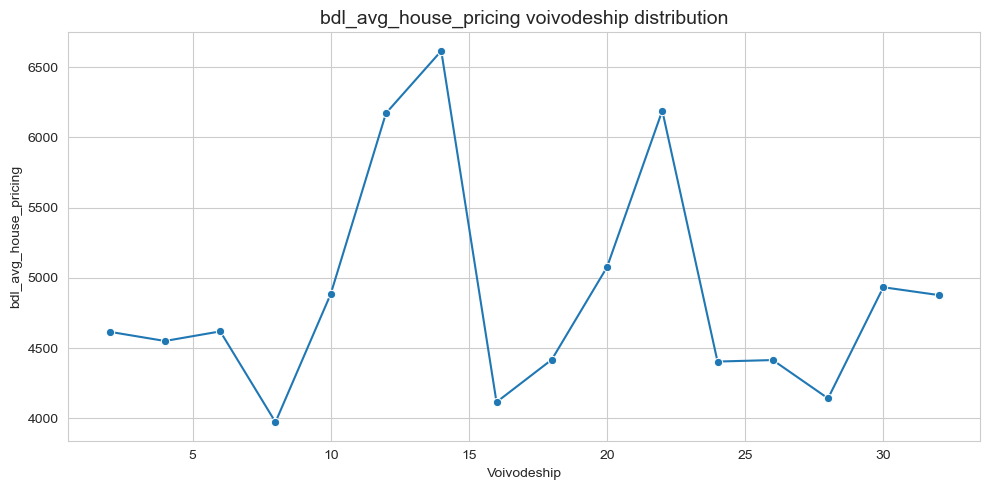

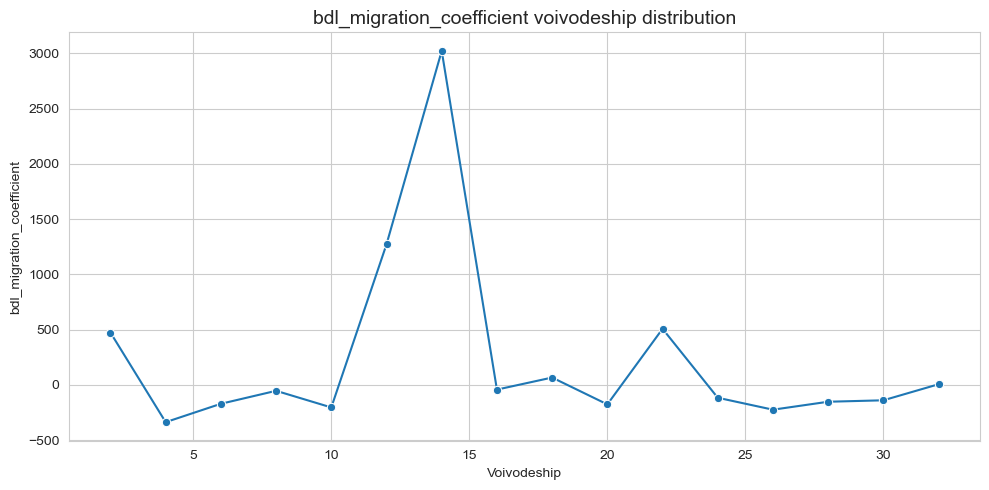

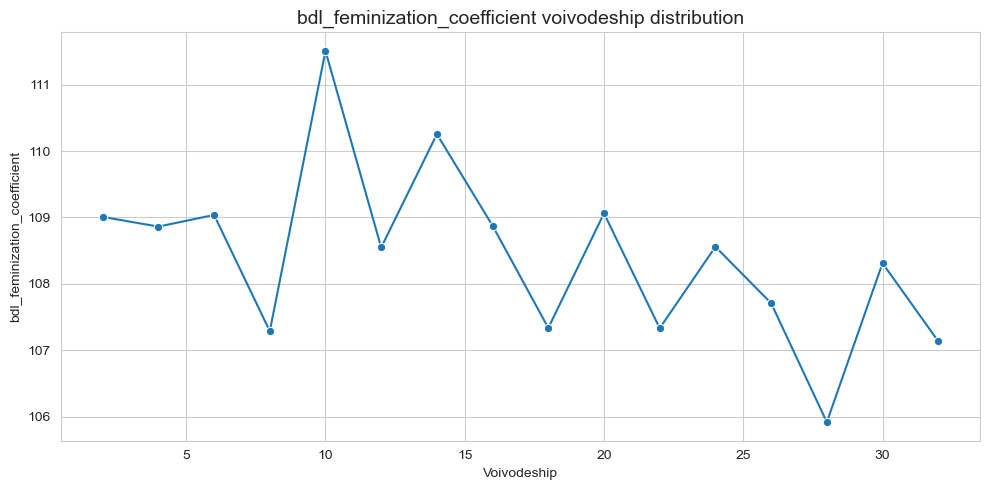

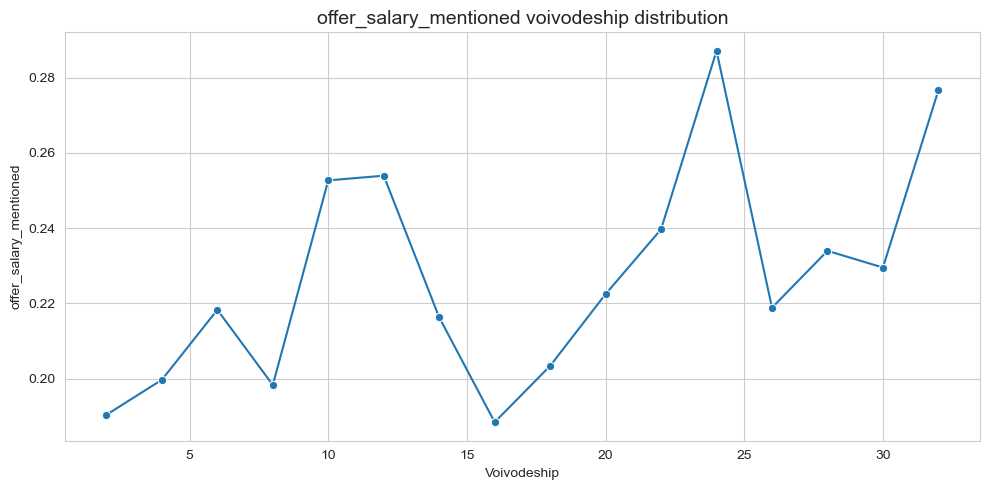

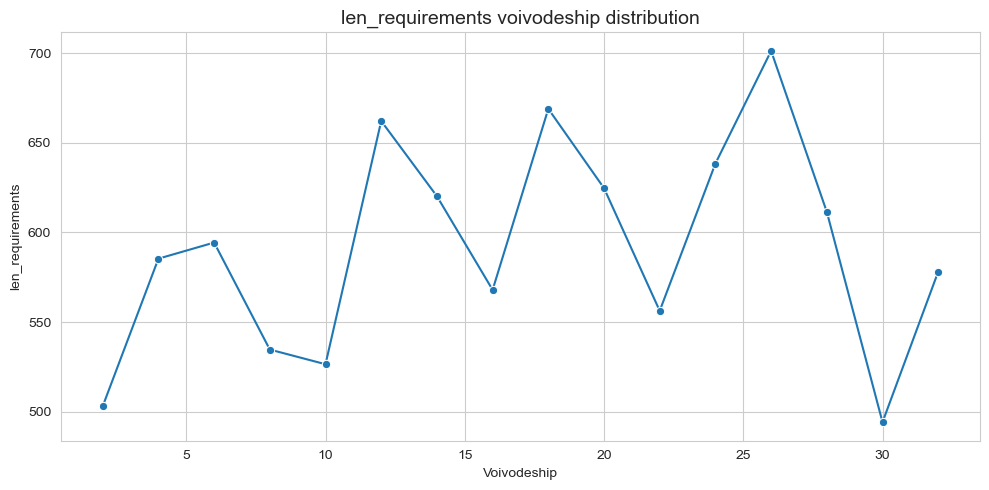

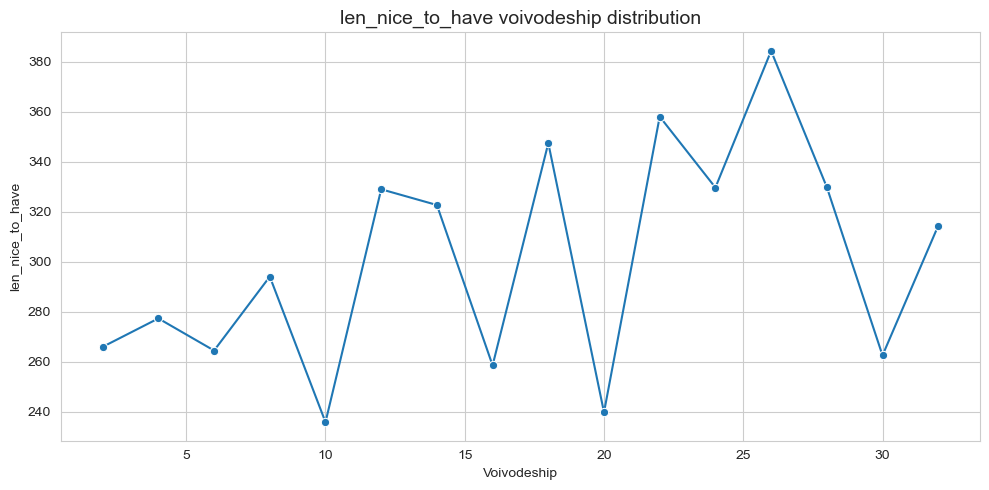

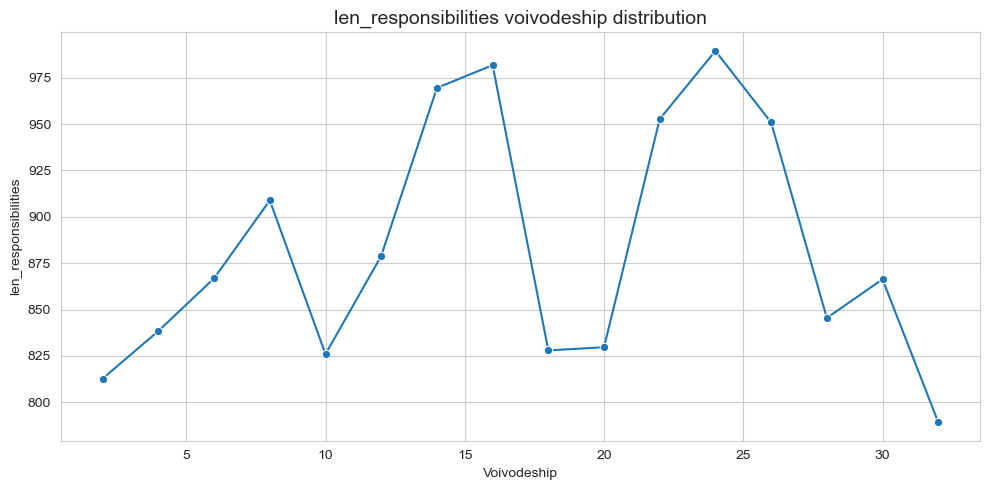

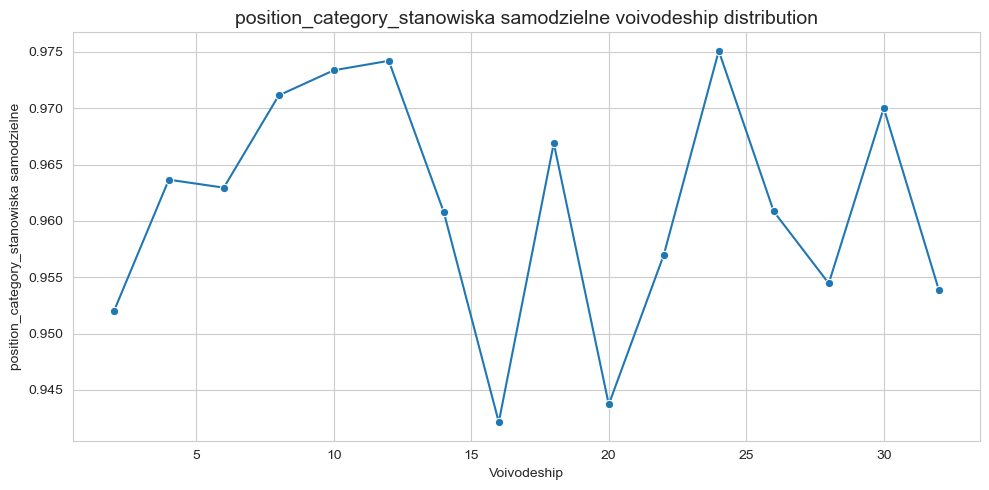

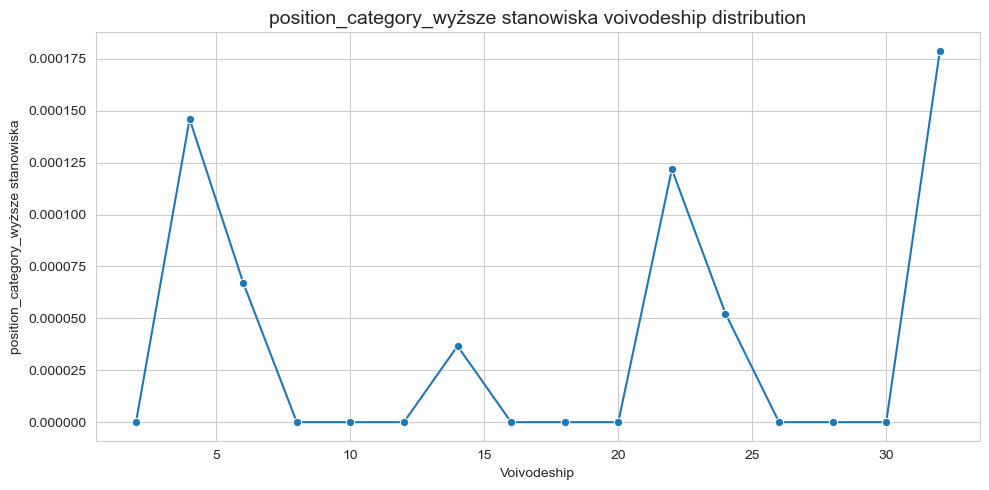

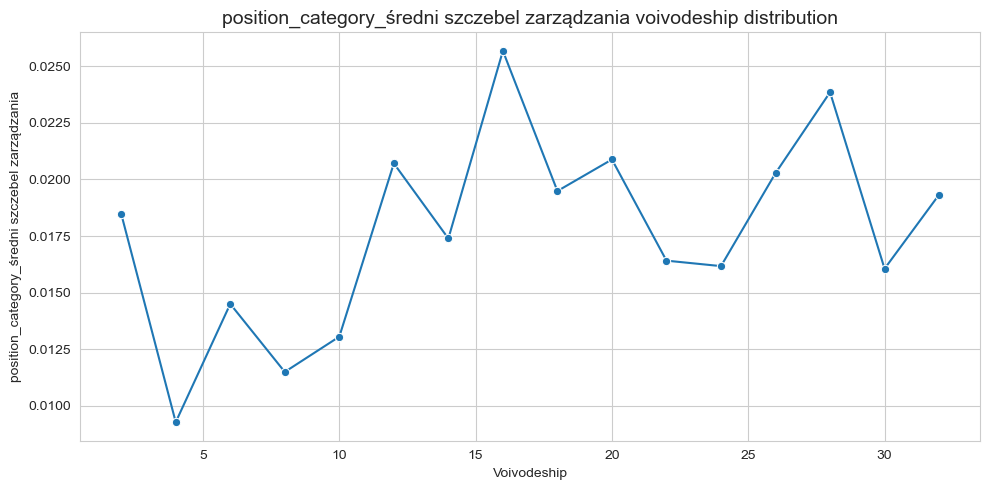

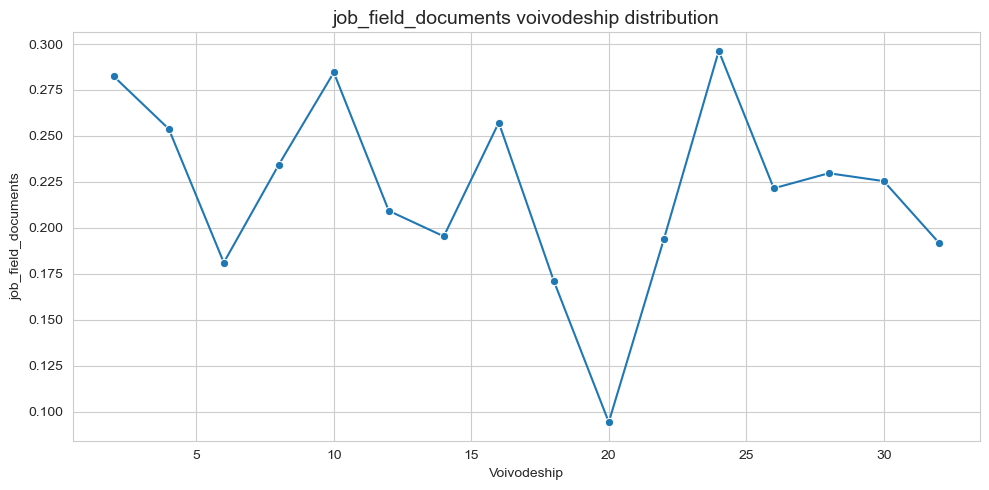

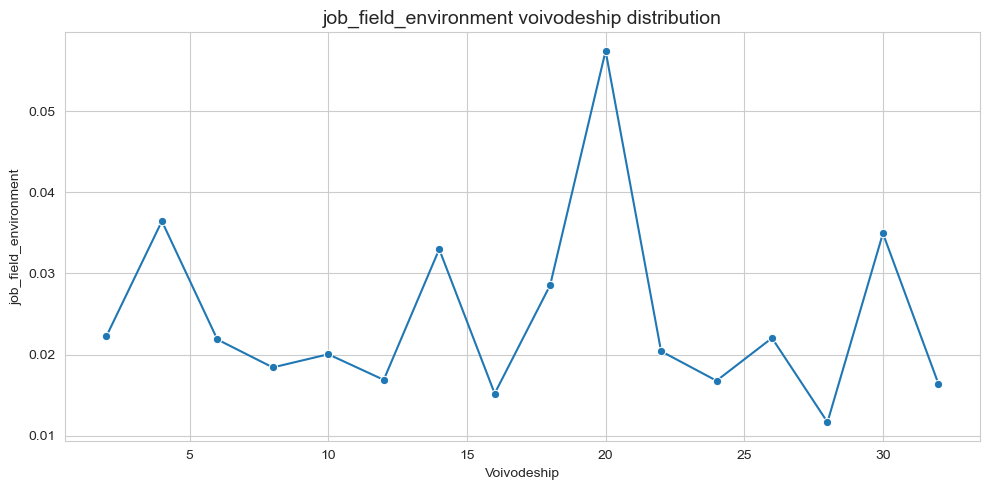

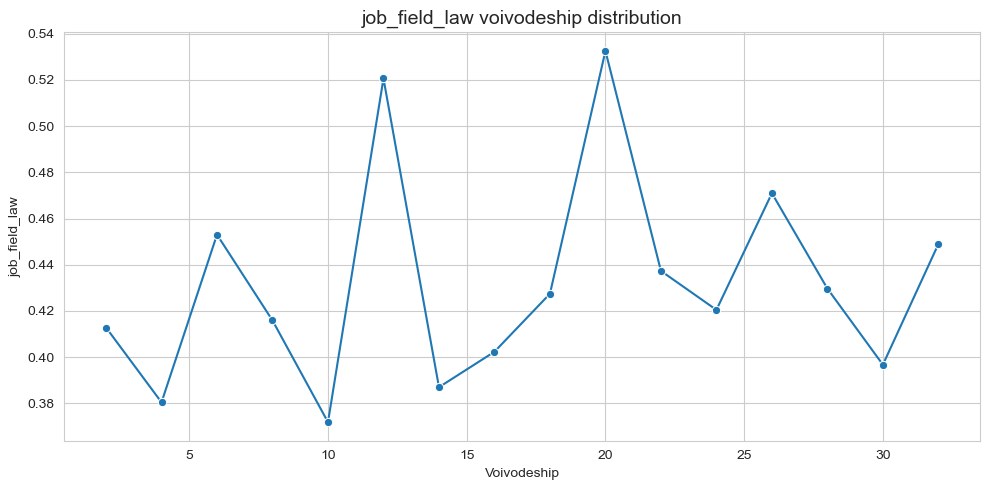

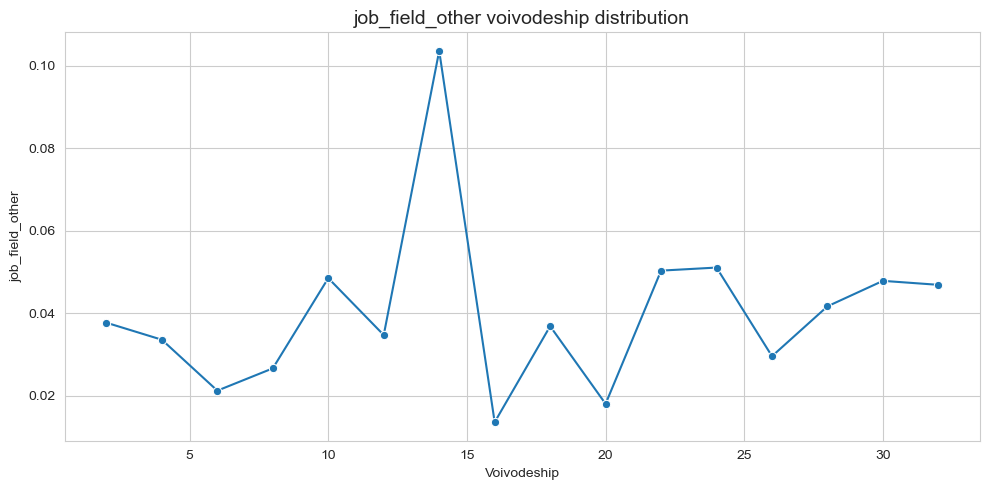

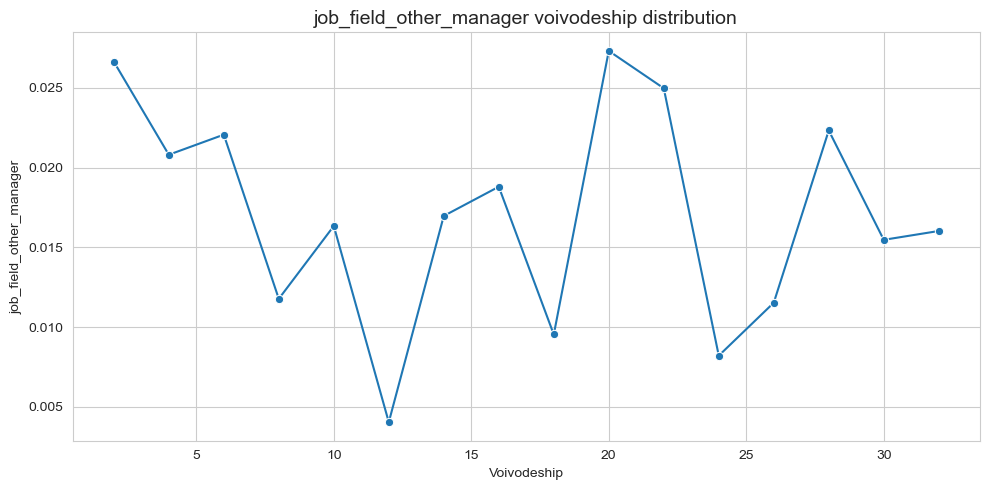

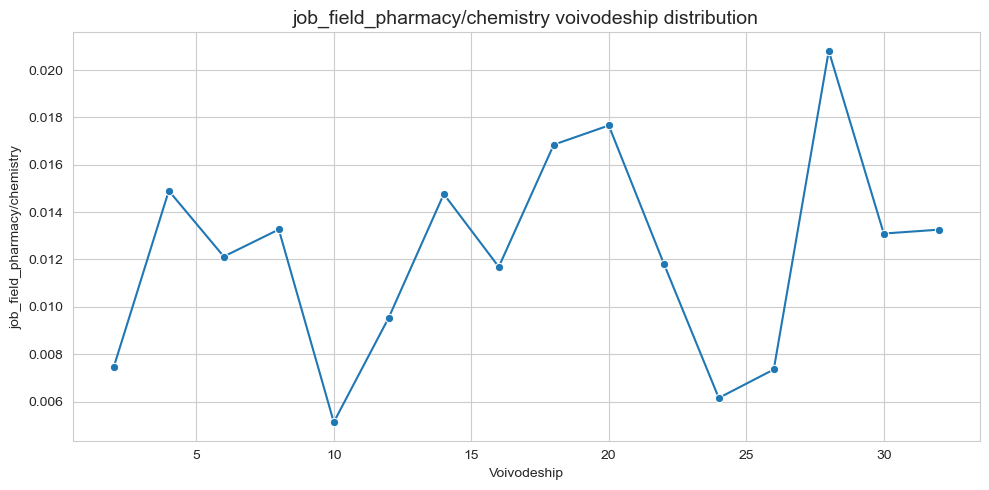

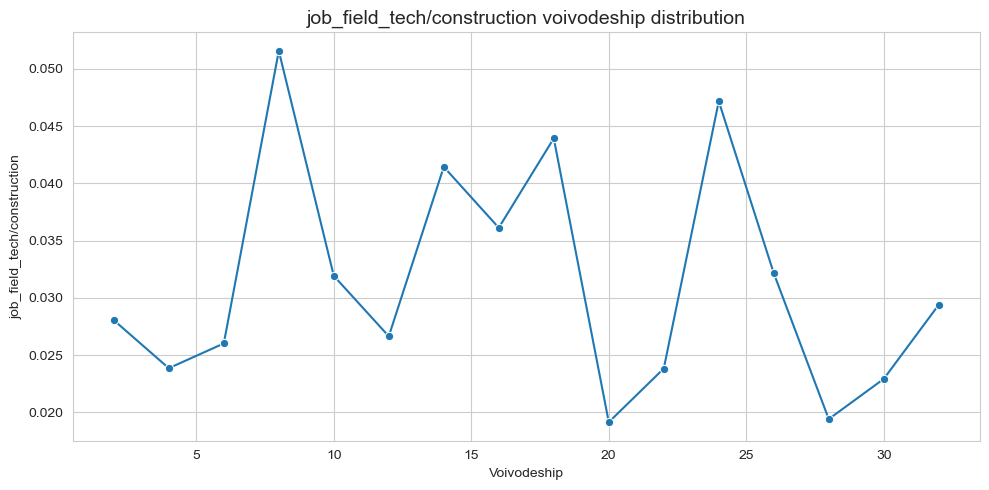

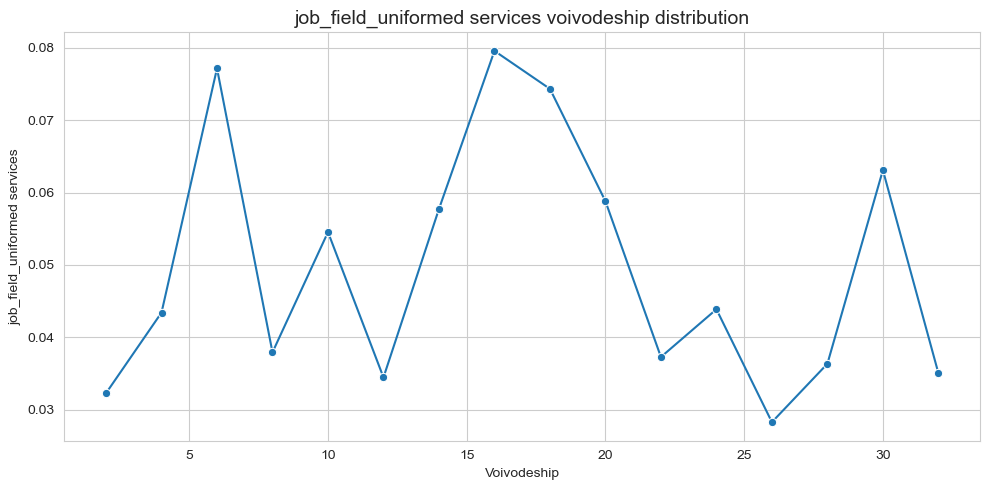

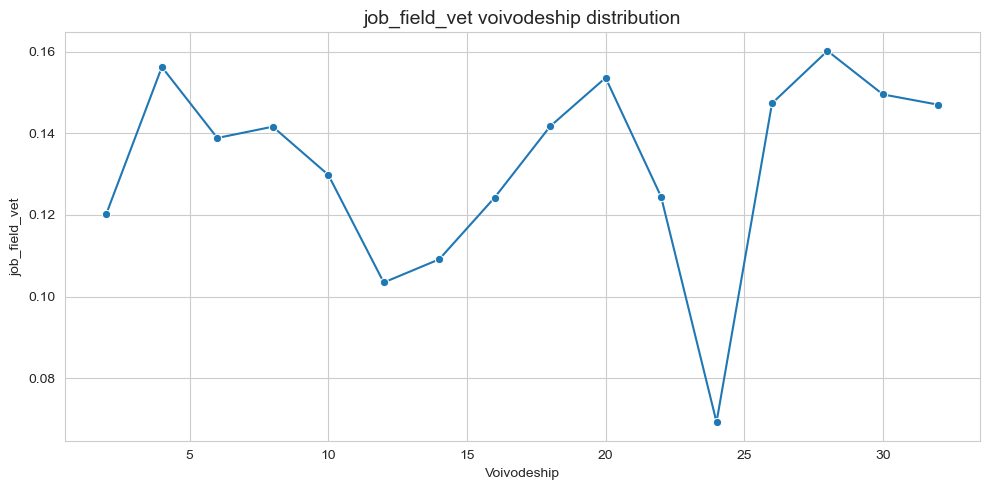

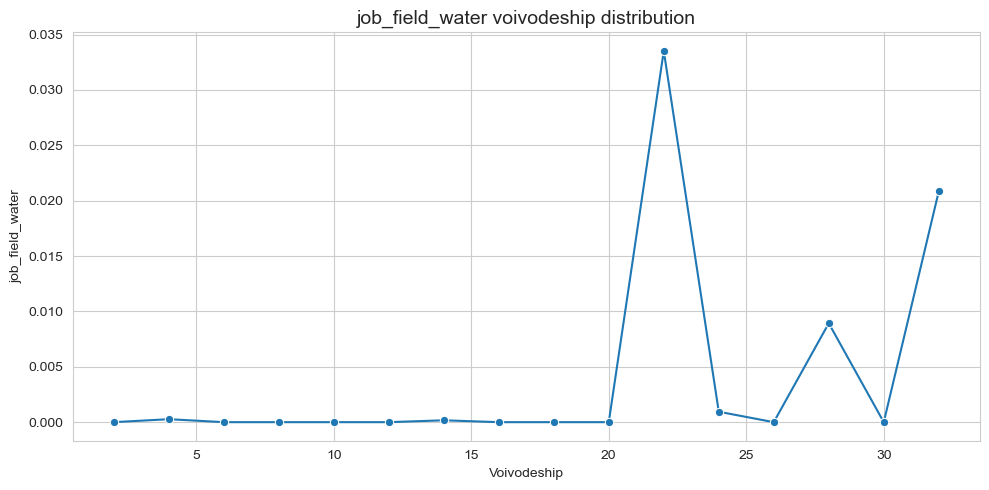

In [75]:
def plot_individual_time_series(dataframe):
    # Columns to exclude from plotting
    exclude_columns = ['work_time', 'year', 'district', 'voivodeship', 'institution']

    # Group by year and compute mean for numeric columns only.
    df_grouped = dataframe.groupby(['voivodeship']).mean(numeric_only=True)

    # Drop the excluded columns (if they exist).
    columns_to_plot = [col for col in df_grouped.columns if col not in exclude_columns]

    # Plot each column individually
    for column in columns_to_plot:
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=df_grouped.index, y=df_grouped[column], marker='o')
        plt.title(f"{column} voivodeship distribution", fontsize=14)
        plt.xlabel("Voivodeship")
        plt.ylabel(column)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_individual_time_series(df_institution_level)

## Feature importance

### Initial assumptions

In [76]:
# As a result of the above analyses, I decided to exclude certain columns due to their low variability or low correlation.
cols_to_exclude = [
    "women_percentage",
    "bdl_feminization_coefficient",
    "len_nice_to_have",
    "work_time",
]

df_institution_level = df_institution_level.drop(columns=cols_to_exclude, axis=1)

### Lasso

In [77]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

In [81]:
df_for_lasso = df_institution_level.drop(columns=['institution', 'district', 'voivodeship', 'year', 'salary_for_position'], axis=1)
df_for_lasso = df_for_lasso.dropna()
X = df_for_lasso.drop('result', axis=1)
y = df_for_lasso['result']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=0).fit(X_scaled, y)

importance = pd.Series(lasso.coef_, index=X.columns)
importance = importance.sort_values(key=abs, ascending=False)
print(importance)

job_field_vet                                   -0.099756
applicants                                       0.051562
ad_views                                         0.035435
job_field_documents                              0.027539
education_level                                 -0.017374
job_field_pharmacy/chemistry                    -0.015300
len_requirements                                -0.014729
bdl_district_expenses                            0.014018
offer_salary_mentioned                           0.013952
position_category_stanowiska samodzielne        -0.012393
advertised_institution                           0.009016
bdl_average_salary                               0.008320
job_field_tech/construction                      0.005686
employment_contract                              0.005495
bdl_migration_coefficient                       -0.004324
job_field_uniformed services                     0.002733
position_category_średni szczebel zarządzania    0.001603
job_field_law 

In [ ]:
selected_features = importance[importance != 0].index.tolist()
df_institution_level = df_institution_level[selected_features]

importance[importance != 0].sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Lasso Variable Importance')
plt.xlabel('Coefficient Value')
plt.show()